<a href="https://colab.research.google.com/github/hwuiwon/data-analysis-study/blob/master/02_Data_Analysis_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **02-Data-Analysis-and-Visualization**

Click [this](https://colab.research.google.com/notebook#create=true&language=r) to create new R-Notebook.

In [0]:
library(IRdisplay)

## **Analytical model**

**Modeling**: the representation, often mathematical, of a relationship between variables

## **Loading Dataset**

Data used in this example can be found [here](https://drive.google.com/open?id=17GRc4sLAe_gBR5ezJOUeU6Na5lX5OVby).

In [0]:
# Set working directory
setwd('/content/r_data')

**utils::read.csv()** -> DataFrame object

**readr::read_delim()** -> Tibble object, DataFrame object

**data.table::fread()** -> Data.table object, DataFrame object

In [6]:
# Install 'data.table' package
install.packages('data.table')
library(data.table)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
my <- fread(input = 'tour.csv', header = TRUE, sep = ',',
               stringsAsFactors = TRUE, strip.white = TRUE,
               na.strings = c('.', '?', 'NA'))
str(my)

Classes ‘data.table’ and 'data.frame':	13841 obs. of  24 variables:
 $ id      : int  584 840 524 282 562 722 128 209 566 514 ...
 $ month   : int  3 11 6 2 8 2 4 5 12 3 ...
 $ gender  : int  2 1 1 1 1 2 2 2 2 2 ...
 $ edu     : int  1 2 3 2 3 3 2 2 3 2 ...
 $ job     : int  8 2 8 8 6 12 5 5 9 4 ...
 $ age     : int  0 3 1 1 2 1 1 1 1 1 ...
 $ nat     : int  1 4 13 9 9 8 9 NA NA 3 ...
 $ other   : int  NA 1 NA NA 1 NA NA NA NA 1 ...
 $ decision: int  1 5 4 2 2 12 6 6 5 1 ...
 $ object  : int  8 1 7 5 1 1 1 1 5 1 ...
 $ count   : int  1 18 1 2 1 2 1 1 1 4 ...
 $ member  : int  3 2 1 1 1 3 2 2 2 2 ...
 $ number  : int  2 4 1 1 1 2 9 2 2 2 ...
 $ period  : int  3 7 21 7 7 37 7 8 21 4 ...
 $ accom   : int  1 1 3 4 2 2 2 2 2 1 ...
 $ expense : num  481 647 561 509 409 ...
 $ card    : num  0 323 0 0 0 ...
 $ cash    : num  481 323 561 509 409 ...
 $ activity: int  19 18 22 1 17 11 21 22 1 1 ...
 $ overal  : int  5 5 4 5 4 5 5 5 4 5 ...
 $ bf_img  : int  5 3 3 5 4 5 4 4 3 4 ...
 $ af_img  : 

## **Exploring DataFrame**

In [23]:
# install libraries that give statistical analysis
install.packages(c('psych', 'Hmisc', 'skimr'))
library(psych)
library(Hmisc)
library(skimr)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘Formula’, ‘latticeExtra’, ‘acepack’, ‘gridExtra’, ‘htmlTable’, ‘viridis’


Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha



Attaching package: ‘Hmisc’


The following object is masked from ‘package:psych’:

    describe


The following objects are masked from ‘package:base’:

    format.pval, units




In [13]:
headTail(my, 5, 5)

id,month,gender,edu,job,age,nat,other,decision,object,⋯,accom,expense,card,cash,activity,overal,bf_img,af_img,revisit,recom
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
584,3,2,1,8,0,1,NA,1,8,⋯,1,480.98,0,480.98,19,5,5,5,5,5
840,11,1,2,2,3,4,1,5,1,⋯,1,646.89,323.44,323.44,18,5,3,4,4,4
524,6,1,3,8,1,13,NA,4,7,⋯,3,560.65,0,560.65,22,4,3,4,3,3
282,2,1,2,8,1,9,NA,2,5,⋯,4,509.23,0,509.23,1,5,5,5,5,5
562,8,1,3,6,2,9,1,2,1,⋯,2,409,0,409,17,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,⋯,...,...,...,...,...,...,...,...,...,...
7003,12,2,2,3,2,1,NA,3,1,⋯,1,711.92,133.49,578.43,18,4,3,4,4,4
7004,12,2,1,7,4,1,NA,2,1,⋯,1,854.3,177.98,676.32,18,4,4,4,4,4
7005,12,1,1,7,4,1,NA,1,1,⋯,2,311.46,0,311.46,18,4,4,4,4,4


In [18]:
# See dimension of a dataset
dim(my)

sprintf('There are %d records and %d columns', dim(my)[1], dim(my)[2])
colnames(my)

[1] 13841    24

[1] "There are 13841 records and 24 columns"

[1] "id"       "month"    "gender"   "edu"      "job"      "age"     
 [7] "nat"      "other"    "decision" "object"   "count"    "member"  
[13] "number"   "period"   "accom"    "expense"  "card"     "cash"    
[19] "activity" "overal"   "bf_img"   "af_img"   "revisit"  "recom"

In [25]:
# summary(): Show summary
sprintf('Using psych'); psych::describe(my)
sprintf('Using Hmisc'); Hmisc::describe(my)
sprintf('Using skimr'); skimr::skim(my)

[1] "Using psych"

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,1,13841,689.287262,6.203003e+02,587.00,604.273368,444.7800,1.0000,7007,7006,3.60908323,24.15369794,5.272520e+00
month,2,13841,6.465790,3.451753e+00,6.00,6.461483,4.4478,1.0000,12,11,0.00930144,-1.21587429,2.933972e-02
gender,3,13841,1.518098,4.996904e-01,2.00,1.522623,0.0000,1.0000,2,1,-0.07243323,-1.99489754,4.247342e-03
edu,4,13701,2.094446,6.510961e-01,2.00,2.091233,0.0000,1.0000,4,3,0.37044063,0.49957781,5.562486e-03
job,5,13789,5.344695,2.985273e+00,5.00,5.108493,2.9652,1.0000,17,16,0.57914427,-0.29535301,2.542247e-02
age,6,13824,1.906322,1.211417e+00,2.00,1.802351,1.4826,0.0000,5,5,0.68950068,-0.18717877,1.030331e-02
nat,7,13501,7.305014,5.713713e+00,6.00,6.743727,5.9304,1.0000,19,18,0.64142506,-0.90788943,4.917399e-02
other,8,1112,4.053957,5.251271e+00,1.00,2.686517,0.0000,1.0000,20,19,1.97428473,2.85126748,1.574751e-01
decision,9,13841,3.356260,3.536150e+00,2.00,2.648334,1.4826,1.0000,72,71,4.41993083,43.34800504,3.005709e-02


[1] "Using Hmisc"

my 

 24  Variables      13841  Observations
--------------------------------------------------------------------------------
id 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   13841        0     1886        1    689.3    577.1       58      116 
     .25      .50      .75      .90      .95 
     289      587      890     1315     1767 

lowest :    1    2    3    4    5, highest: 7003 7004 7005 7006 7007
--------------------------------------------------------------------------------
month 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   13841        0       12    0.993    6.466    3.972        1        2 
     .25      .50      .75      .90      .95 
       3        6        9       11       12 

lowest :  1  2  3  4  5, highest:  8  9 10 11 12
                                                                            
Value          1     2     3     4     5     6     7     8     9    10    11
Frequency   1180  1162  1169  11

[1] "Using skimr"

── Data Summary ────────────────────────
                           Values
Name                       my    
Number of rows             13841 
Number of columns          24    
_______________________          
Column type frequency:           
  numeric                  24    
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable n_missing complete_rate    mean         sd    p0   p25   p50
 1 id                    0        1       689.      620.    1      289   587 
 2 month                 0        1         6.47      3.45  1        3     6 
 3 gender                0        1         1.52      0.500 1        1     2 
 4 edu                 140        0.990     2.09      0.651 1        2     2 
 5 job                  52        0.996     5.34      2.99  1        3     5 
 6 age                  17        0.999     1.91      1.21  0        1     2 
 7 nat                 34

## **Visualizing data**

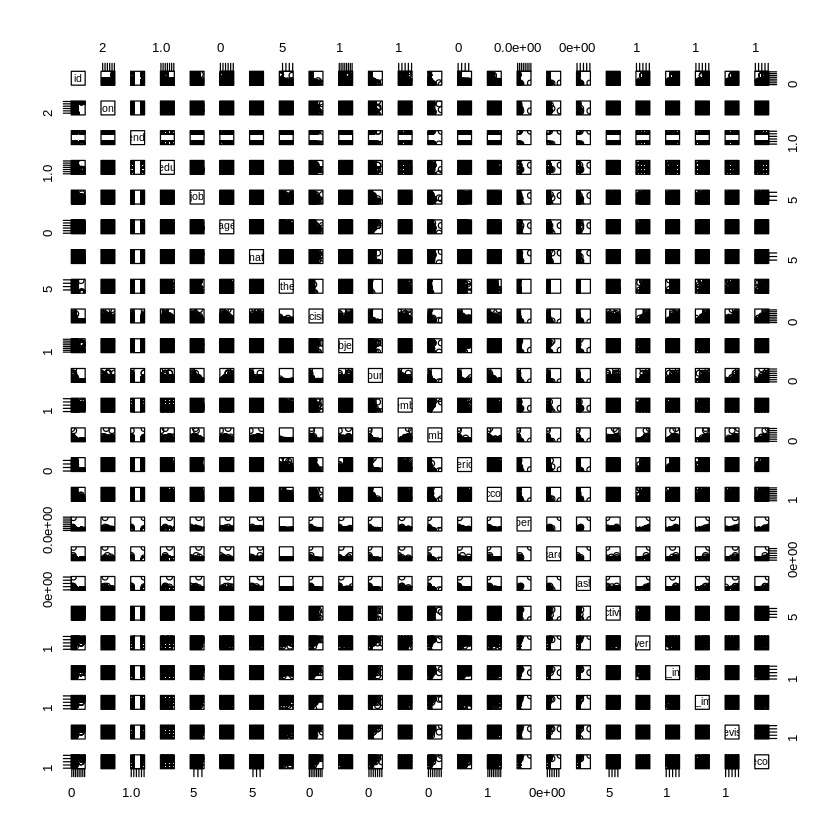

In [26]:
plot(my)

If we know the relationship between the variables, we can predict values.

If the dataset is huge, we can create **subset** to improve readibility of a scatter matrix.

### **Correlation Matrix**

As the value gets closer to **0**, it means there are weak correlation between those two variables given.

However, close the value gets to **-1 or 1**, it means they have strong correlation.
> +1 : Same direction<br>
> -1 : Different direction

Same as **heatmap**.

In [30]:
# cor: correlation
# round(INPUT, VALUE): round up decimals
round(cor(my), 3)

# Remove NA value (Use complete dataset)
round(cor(my, use = 'complete.obs'), 2)

,id,month,gender,edu,job,age,nat,other,decision,object,⋯,accom,expense,card,cash,activity,overal,bf_img,af_img,revisit,recom
id,1.000,-0.006,-0.005,NA,NA,NA,NA,NA,-0.048,-0.079,⋯,NA,0.002,0.003,0.000,0.061,-0.037,-0.033,-0.035,0.030,-0.014
month,-0.006,1.000,-0.009,NA,NA,NA,NA,NA,-0.002,0.022,⋯,NA,-0.010,-0.007,-0.012,0.018,0.015,-0.016,0.012,-0.002,0.017
gender,-0.005,-0.009,1.000,NA,NA,NA,NA,NA,0.023,-0.199,⋯,NA,0.002,0.000,0.003,-0.153,0.016,0.065,0.006,0.020,0.029
edu,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
job,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
age,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
nat,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
other,NA,NA,NA,NA,NA,NA,NA,1,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
decision,-0.048,-0.002,0.023,NA,NA,NA,NA,NA,1.000,0.016,⋯,NA,0.008,0.009,0.007,0.089,0.065,0.005,0.057,0.017,0.107
object,-0.079,0.022,-0.199,NA,NA,NA,NA,NA,0.016,1.000,⋯,NA,-0.001,0.005,-0.006,0.132,0.009,-0.037,0.004,0.051,-0.023


,id,month,gender,edu,job,age,nat,other,decision,object,⋯,accom,expense,card,cash,activity,overal,bf_img,af_img,revisit,recom
id,1.00,0.07,0.03,-0.13,-0.03,0.03,0.02,-0.03,-0.03,-0.03,⋯,-0.05,-0.05,-0.01,-0.05,0.08,-0.02,-0.01,0.00,0.02,-0.01
month,0.07,1.00,-0.06,-0.03,-0.03,0.05,0.09,0.05,0.03,0.04,⋯,0.03,0.01,-0.02,0.02,0.03,0.04,-0.01,0.08,0.10,0.13
gender,0.03,-0.06,1.00,-0.08,0.11,-0.11,-0.22,-0.07,-0.04,-0.05,⋯,-0.03,0.07,0.06,0.05,-0.16,-0.02,0.07,-0.02,0.00,-0.02
edu,-0.13,-0.03,-0.08,1.00,-0.09,0.03,0.07,0.03,0.04,0.06,⋯,-0.01,0.00,0.02,-0.01,0.03,0.04,0.03,0.01,-0.02,0.02
job,-0.03,-0.03,0.11,-0.09,1.00,-0.16,-0.06,-0.02,0.06,0.07,⋯,0.05,0.04,0.02,0.04,-0.02,0.03,0.04,0.01,-0.02,-0.02
age,0.03,0.05,-0.11,0.03,-0.16,1.00,0.01,-0.01,-0.05,-0.05,⋯,-0.15,0.00,-0.02,0.01,0.13,-0.03,-0.05,-0.02,-0.03,-0.01
nat,0.02,0.09,-0.22,0.07,-0.06,0.01,1.00,0.07,0.26,0.13,⋯,0.09,-0.10,-0.15,-0.03,0.30,0.10,0.05,0.11,0.05,0.18
other,-0.03,0.05,-0.07,0.03,-0.02,-0.01,0.07,1.00,0.02,0.04,⋯,0.03,-0.04,-0.03,-0.03,0.04,-0.04,-0.03,-0.03,-0.01,-0.02
decision,-0.03,0.03,-0.04,0.04,0.06,-0.05,0.26,0.02,1.00,0.16,⋯,0.18,-0.04,-0.07,-0.01,0.13,0.07,0.04,0.06,0.03,0.11
object,-0.03,0.04,-0.05,0.06,0.07,-0.05,0.13,0.04,0.16,1.00,⋯,0.18,0.11,0.12,0.05,0.00,0.00,-0.01,-0.01,0.10,0.05


### **Scatter Matrix**

[1] -0.1748387

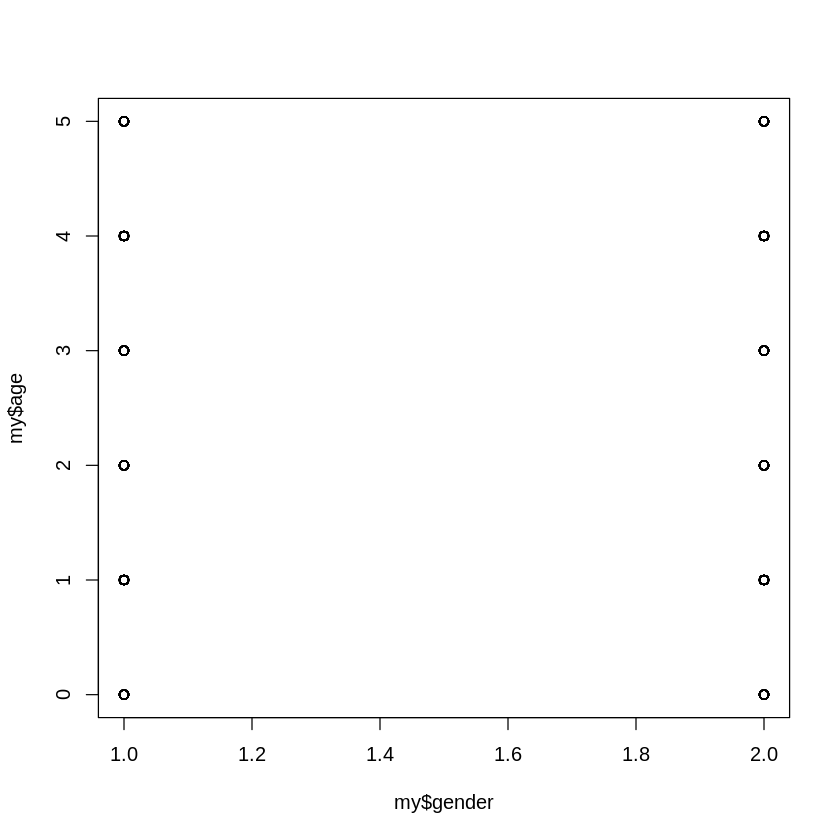

[1] -0.205762

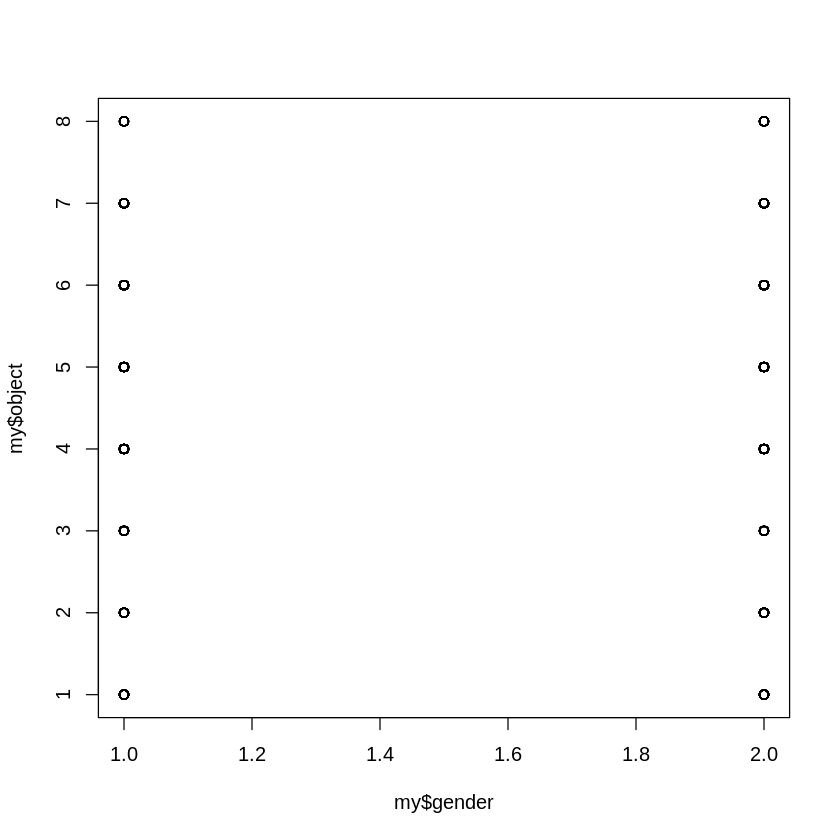

In [34]:
plot(my$gender, my$age)
# Correlation between gender and age
cor(my$gender, my$age, method = 'spearman', use = 'complete.obs')

plot(my$gender, my$object)
# Correlation between gender and purpose of travel
cor(my$gender, my$object, method = 'spearman')

We can see that there are **no correlation** between gender & age, and gender & object.

'data.frame':	13841 obs. of  4 variables:
 $ gender: int  2 1 1 1 1 2 2 2 2 2 ...
 $ age   : int  0 3 1 1 2 1 1 1 1 1 ...
 $ object: int  8 1 7 5 1 1 1 1 5 1 ...
 $ accom : int  1 1 3 4 2 2 2 2 2 1 ...


,gender,age,object,accom
gender,1.00000000,-0.1755577,-0.20614165,0.07490583
age,-0.17555774,1.0000000,0.10376116,-0.20384497
object,-0.20614165,0.1037612,1.00000000,0.09306589
accom,0.07490583,-0.2038450,0.09306589,1.00000000


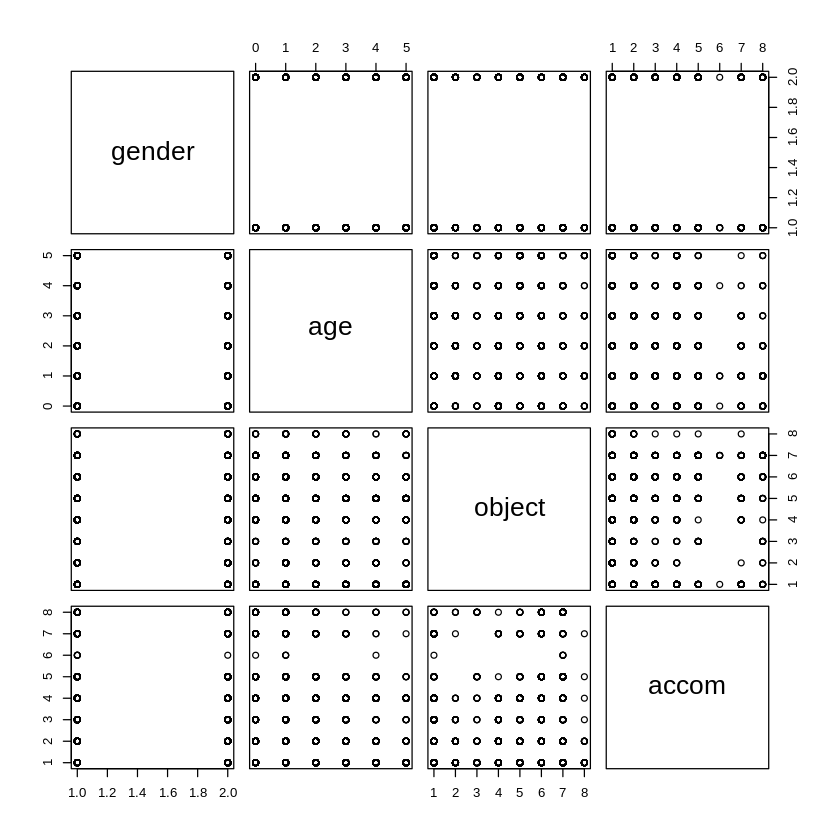

In [40]:
# Extract subsets
setDF(my) #convert to 'data.frame'
ctg <- my[c('gender', 'age', 'object', 'accom')]
str(ctg)

plot(ctg)
cor(ctg, method = 'spearman', use = 'complete.obs')